In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("G:\\Netzwerk assignments\\Tinder_Train.csv")

In [3]:
data.head(25)

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0
5,5,292896.2932,gender,"Meridian, Idaho",No,1091.176696,0.519163,0
6,6,292889.6679,web,"Meridian, Idaho",No,0.000000,0.000000,0
7,7,293223.0000,university,University of Iowa,Yes,1.000000,0.333000,0
8,8,292881.1384,mobile,"Meridian, Idaho",No,878.080463,0.228031,0
9,9,292889.6084,web,"Meridian, Idaho",No,0.000000,0.000000,0


In [4]:
data.shape

(1896, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1896 non-null   int64  
 1   ID                        1896 non-null   float64
 2   Segment type              1896 non-null   object 
 3   Segment Description       1896 non-null   object 
 4   Answer                    1896 non-null   object 
 5   Count                     1896 non-null   float64
 6   Percentage                1896 non-null   float64
 7   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 118.6+ KB


In [6]:
data.describe()

,Unnamed: 0,ID,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,947.500000,292999.394750,446.881267,0.254098,0.350738
std,547.472374,227.809806,494.110578,0.220809,0.477327
min,0.000000,292881.000000,0.000000,0.000000,0.000000
25%,473.750000,292888.196925,0.000000,0.000000,0.000000
50%,947.500000,292893.904400,400.439633,0.257873,0.000000
75%,1421.250000,292902.568750,845.560798,0.396787,1.000000
max,1895.000000,293785.000000,1969.000000,1.000000,1.000000


In [7]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Segment type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a relationship    0
dtype: int64

## We have to encode the categorical data  

In [8]:
data['Segment type'].unique()

array(['web', 'gender', 'university', 'mobile'], dtype=object)

In [9]:
data['Segment type'].value_counts()

gender        488
mobile        483
university    464
web           461
Name: Segment type, dtype: int64

In [10]:
data['Segment Description'].value_counts()

Meridian, Idaho                    1421
Westport, CT                         14
University of Pennsylvania           12
University of Mississippi            10
University of Washington             10
                                   ... 
University of Alabama                 1
Southern Methodist University         1
Castleton State College               1
Mississippi State University          1
University of Wisconsin-Madison       1
Name: Segment Description, Length: 148, dtype: int64

In [11]:
len(data['Segment Description'].value_counts())

148

In [12]:
data['Answer'].value_counts()

No                    1571
Yes                    164
I don't use Tinder     161
Name: Answer, dtype: int64

In [13]:
data['It became a relationship'].value_counts()

0    1231
1     665
Name: It became a relationship, dtype: int64

How can 'It became a relationship' : 1 value_count higher than 'Answer' : Yes value_count?
Are people dishonest in their answers?

## Frequency/Count Encoding 

Frequency/Count Encoding : 

It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data

In [14]:
sd_frequency_dict = data['Segment Description'].value_counts().to_dict()
sd_frequency_dict

{'Meridian, Idaho': 1421,
 'Westport, CT': 14,
 'University of Pennsylvania': 12,
 'University of Mississippi': 10,
 'University of Washington': 10,
 'University of Southern California': 9,
 'Wesleyan University': 8,
 'University of Tampa': 8,
 'University of California, Santa Cruz': 8,
 'Washington State University': 8,
 'University of Wisconsin, Eau Claire': 8,
 'University of California, Berkeley': 8,
 'Union College': 7,
 'Vanderbilt University': 7,
 'Vassar College': 7,
 'Williams College': 7,
 'University of Oregon': 7,
 'University of Buffalo': 7,
 'University of Delaware': 6,
 'Whatsgoodly University': 6,
 'University of California, Davis': 6,
 'University of Central Oklahoma': 5,
 'University of Miami': 5,
 'University of Central Florida': 5,
 'University of Kansas': 5,
 'University of Pittsburgh': 4,
 'Yale University': 4,
 'University of Missouri': 4,
 'University of Rochester': 4,
 'University of Kentucky': 4,
 'University of Notre Dame': 4,
 'Syracuse University': 4,
 'Uni

In [15]:
data['Segment Description_new'] = data['Segment Description'].map(sd_frequency_dict)

In [16]:
len(data['Segment Description_new'].value_counts())

13

In [17]:
data['Segment Description_new'].value_counts()

1421    1421
3        144
2         80
8         48
4         44
7         42
1         24
10        20
5         20
6         18
14        14
12        12
9          9
Name: Segment Description_new, dtype: int64

In [18]:
data.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship,Segment Description_new
0,0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0,1421
1,1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0,1421
2,2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0,1421
3,3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0,1421
4,4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0,1421


In [19]:
data.drop(['Segment Description'], axis=1, inplace= True)

Since for question Do you use tinder ? Answer is Yes or (No / I don't use Tinder), there are only two classes 

In [20]:
answer_dict = {'Yes':1, 'No':0, "I don't use Tinder" :0}
data['Answer'] = data['Answer'].map(answer_dict)

### One hot encoding the remaining data

In [21]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Unnamed: 0,ID,Answer,Count,Percentage,It became a relationship,Segment Description_new,Segment type_mobile,Segment type_university,Segment type_web
0,0,292890.8970,0,0.000000,0.000000,0,1421,0,0,1
1,1,292887.9870,0,0.000000,0.000000,0,1421,0,0,1
2,2,292894.0656,0,499.173606,0.225255,0,1421,0,0,0
3,3,292887.1180,0,0.000000,0.000000,0,1421,0,0,1
4,4,292893.6561,0,455.925963,0.211360,0,1421,0,0,0


In [22]:
data.drop(['Unnamed: 0', 'ID'], axis=1, inplace= True)

In [23]:
data.head()

,Answer,Count,Percentage,It became a relationship,Segment Description_new,Segment type_mobile,Segment type_university,Segment type_web
0,0,0.000000,0.000000,0,1421,0,0,1
1,0,0.000000,0.000000,0,1421,0,0,1
2,0,499.173606,0.225255,0,1421,0,0,0
3,0,0.000000,0.000000,0,1421,0,0,1
4,0,455.925963,0.211360,0,1421,0,0,0


<AxesSubplot:>

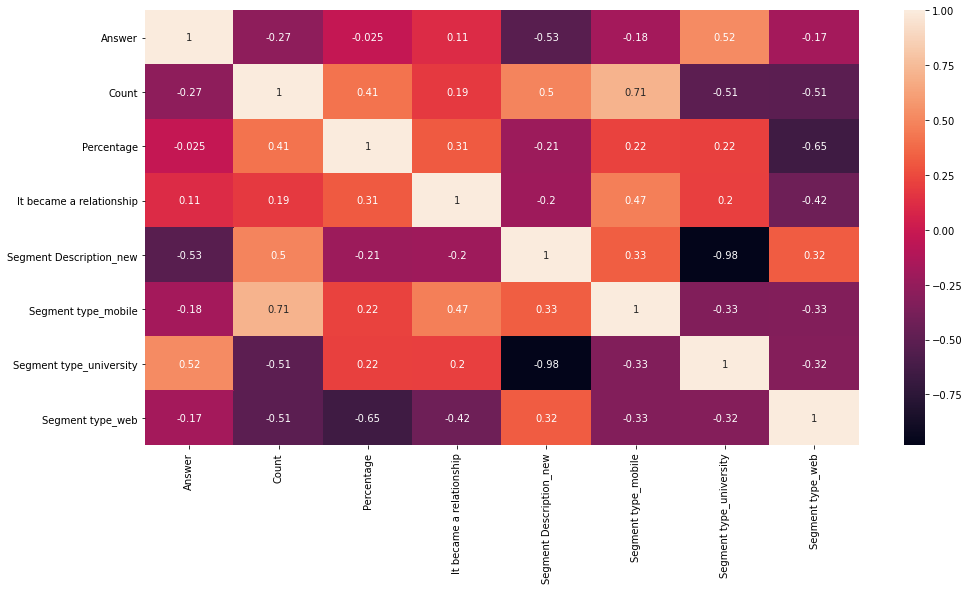

In [24]:
plt.figure(figsize=(16,8))
corr = data.corr()
sns.heatmap(corr, annot = True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = data.drop(['It became a relationship'], axis=1)
y = data['It became a relationship']

In [27]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.25, random_state= 0)

### Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr  = LogisticRegression()
model = lr.fit(x_train, y_train)

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
confusion_matrix(y_pred, y_test)

array([[271,  58],
       [ 33, 112]], dtype=int64)

In [33]:
accuracy_score(y_pred, y_test)

0.8080168776371308

## With Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
model = lr.fit(x_train, y_train)

In [37]:
y_pred = model.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

0.79957805907173

In [39]:
confusion_matrix( y_test, y_pred)

array([[270,  34],
       [ 61, 109]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       304
           1       0.76      0.64      0.70       170

    accuracy                           0.80       474
   macro avg       0.79      0.76      0.77       474
weighted avg       0.80      0.80      0.80       474



### With SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
os = SMOTE()

In [43]:
x1, y1 = os.fit_resample(x,y)

In [44]:
from collections import Counter

In [45]:
count = Counter(y1)
count

Counter({0: 1231, 1: 1231})

In [46]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state = 1)

In [47]:
x_train1 = sc.fit_transform(x_train1)

In [48]:
x_test1 = sc.transform(x_test1)

In [49]:
model1= lr.fit(x_train1, y_train1)

In [50]:
y_pred1 =model1.predict(x_test1)

In [51]:
accuracy_score(y_test1, y_pred1)

0.814935064935065

In [52]:
confusion_matrix(y_test1, y_pred1)

array([[224,  85],
       [ 29, 278]], dtype=int64)

In [53]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       309
           1       0.77      0.91      0.83       307

    accuracy                           0.81       616
   macro avg       0.83      0.82      0.81       616
weighted avg       0.83      0.81      0.81       616



### Testing the original data with the MODEL built using over_sampled data 

In [54]:
y_pred = model1.predict(x_test)

In [55]:
model1.score(x_train, y_train)

0.7742616033755274

In [56]:
model1.score(x_test , y_test)

0.7869198312236287

In [57]:
accuracy_score(y_pred, y_test)

0.7869198312236287

In [58]:
confusion_matrix(y_test, y_pred)

array([[226,  78],
       [ 23, 147]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       304
           1       0.65      0.86      0.74       170

    accuracy                           0.79       474
   macro avg       0.78      0.80      0.78       474
weighted avg       0.82      0.79      0.79       474



model has good precision but bad recall, model1 has bad precision but good recall. Overall accuracy score of both the models are Identical.

For advertising purpose,we need have good recall.  

### CART 

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model2 = DecisionTreeClassifier(criterion= 'gini')

In [62]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
model2.score(x_train, y_train)

0.9824191279887482

In [64]:
model2.score(x_test, y_test)

0.9135021097046413

In [65]:
y_pred = model2.predict(x_test)

In [66]:
accuracy_score(y_test, y_pred)

0.9135021097046413

In [67]:
confusion_matrix(y_test, y_pred)

array([[293,  11],
       [ 30, 140]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       304
           1       0.93      0.82      0.87       170

    accuracy                           0.91       474
   macro avg       0.92      0.89      0.90       474
weighted avg       0.91      0.91      0.91       474



### ID3 

In [69]:
model3 = DecisionTreeClassifier(criterion = 'entropy')

In [71]:
model3.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy')

In [72]:
model3.score(x_train, y_train)

0.819971870604782

In [73]:
model3.score(x_test, y_test)

0.8396624472573839

In [74]:
y_pred = model3.predict(x_test)

In [75]:
accuracy_score(y_test, y_pred)

0.8396624472573839

In [76]:
confusion_matrix(y_test, y_pred)

array([[300,   4],
       [ 72,  98]], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       304
           1       0.96      0.58      0.72       170

    accuracy                           0.84       474
   macro avg       0.88      0.78      0.80       474
weighted avg       0.86      0.84      0.83       474

